GOOGLE SEARCH POPULARITY PREDCITOR

In [1]:
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split

In [149]:
#df = dailydata.get_daily_data('india', 2020, 1, 2022, 1)


india:2020-01-01 2020-01-31
india:2020-02-01 2020-02-29
india:2020-03-01 2020-03-31
india:2020-04-01 2020-04-30
india:2020-05-01 2020-05-31


ResponseError: The request failed: Google returned a response with code 429.

In [2]:
pytrends= TrendReq(hl='en-US')

keywords=['coats']

pytrends.build_payload(keywords, timeframe='all')

data= pytrends.interest_over_time()
data.to_csv('abcd.csv')
data

,coats,isPartial
date,,
2004-01-01,50,False
2004-02-01,33,False
2004-03-01,29,False
2004-04-01,21,False
2004-05-01,20,False
...,...,...
2022-09-01,35,False
2022-10-01,43,False
2022-11-01,55,False


In [55]:
df
df.to_csv('gh.csv')


In [494]:
pytrends.build_payload(keywords, timeframe='all')
mydata= pytrends.interest_over_time()

mydata.to_csv('next.csv')

In [57]:
# LETS TAKE THE DAILY DATA ONLY




,python_unscaled,python_monthly,isPartial,scale,python
date,,,,,
2020-01-01,32,NaN,NaN,NaN,NaN
2020-01-02,58,NaN,NaN,NaN,NaN
2020-01-03,59,NaN,NaN,NaN,NaN
2020-01-04,38,NaN,NaN,NaN,NaN
2020-01-05,35,63.0,False,0.63,22.05
...,...,...,...,...,...
2022-12-26,40,51.0,NaN,0.51,20.40
2022-12-27,58,51.0,NaN,0.51,29.58
2022-12-28,60,51.0,NaN,0.51,30.60


In [3]:
x= pd.DataFrame(data)
x1= data.iloc[:, 0]
x1.to_csv('rd.csv')
m= pd.read_csv('rd.csv')
m

,date,coats
0,2004-01-01,50
1,2004-02-01,33
2,2004-03-01,29
3,2004-04-01,21
4,2004-05-01,20
...,...,...
224,2022-09-01,35
225,2022-10-01,43
226,2022-11-01,55
227,2022-12-01,52


In [4]:
m.columns=['date', 'value']
m

,date,value
0,2004-01-01,50
1,2004-02-01,33
2,2004-03-01,29
3,2004-04-01,21
4,2004-05-01,20
...,...,...
224,2022-09-01,35
225,2022-10-01,43
226,2022-11-01,55
227,2022-12-01,52


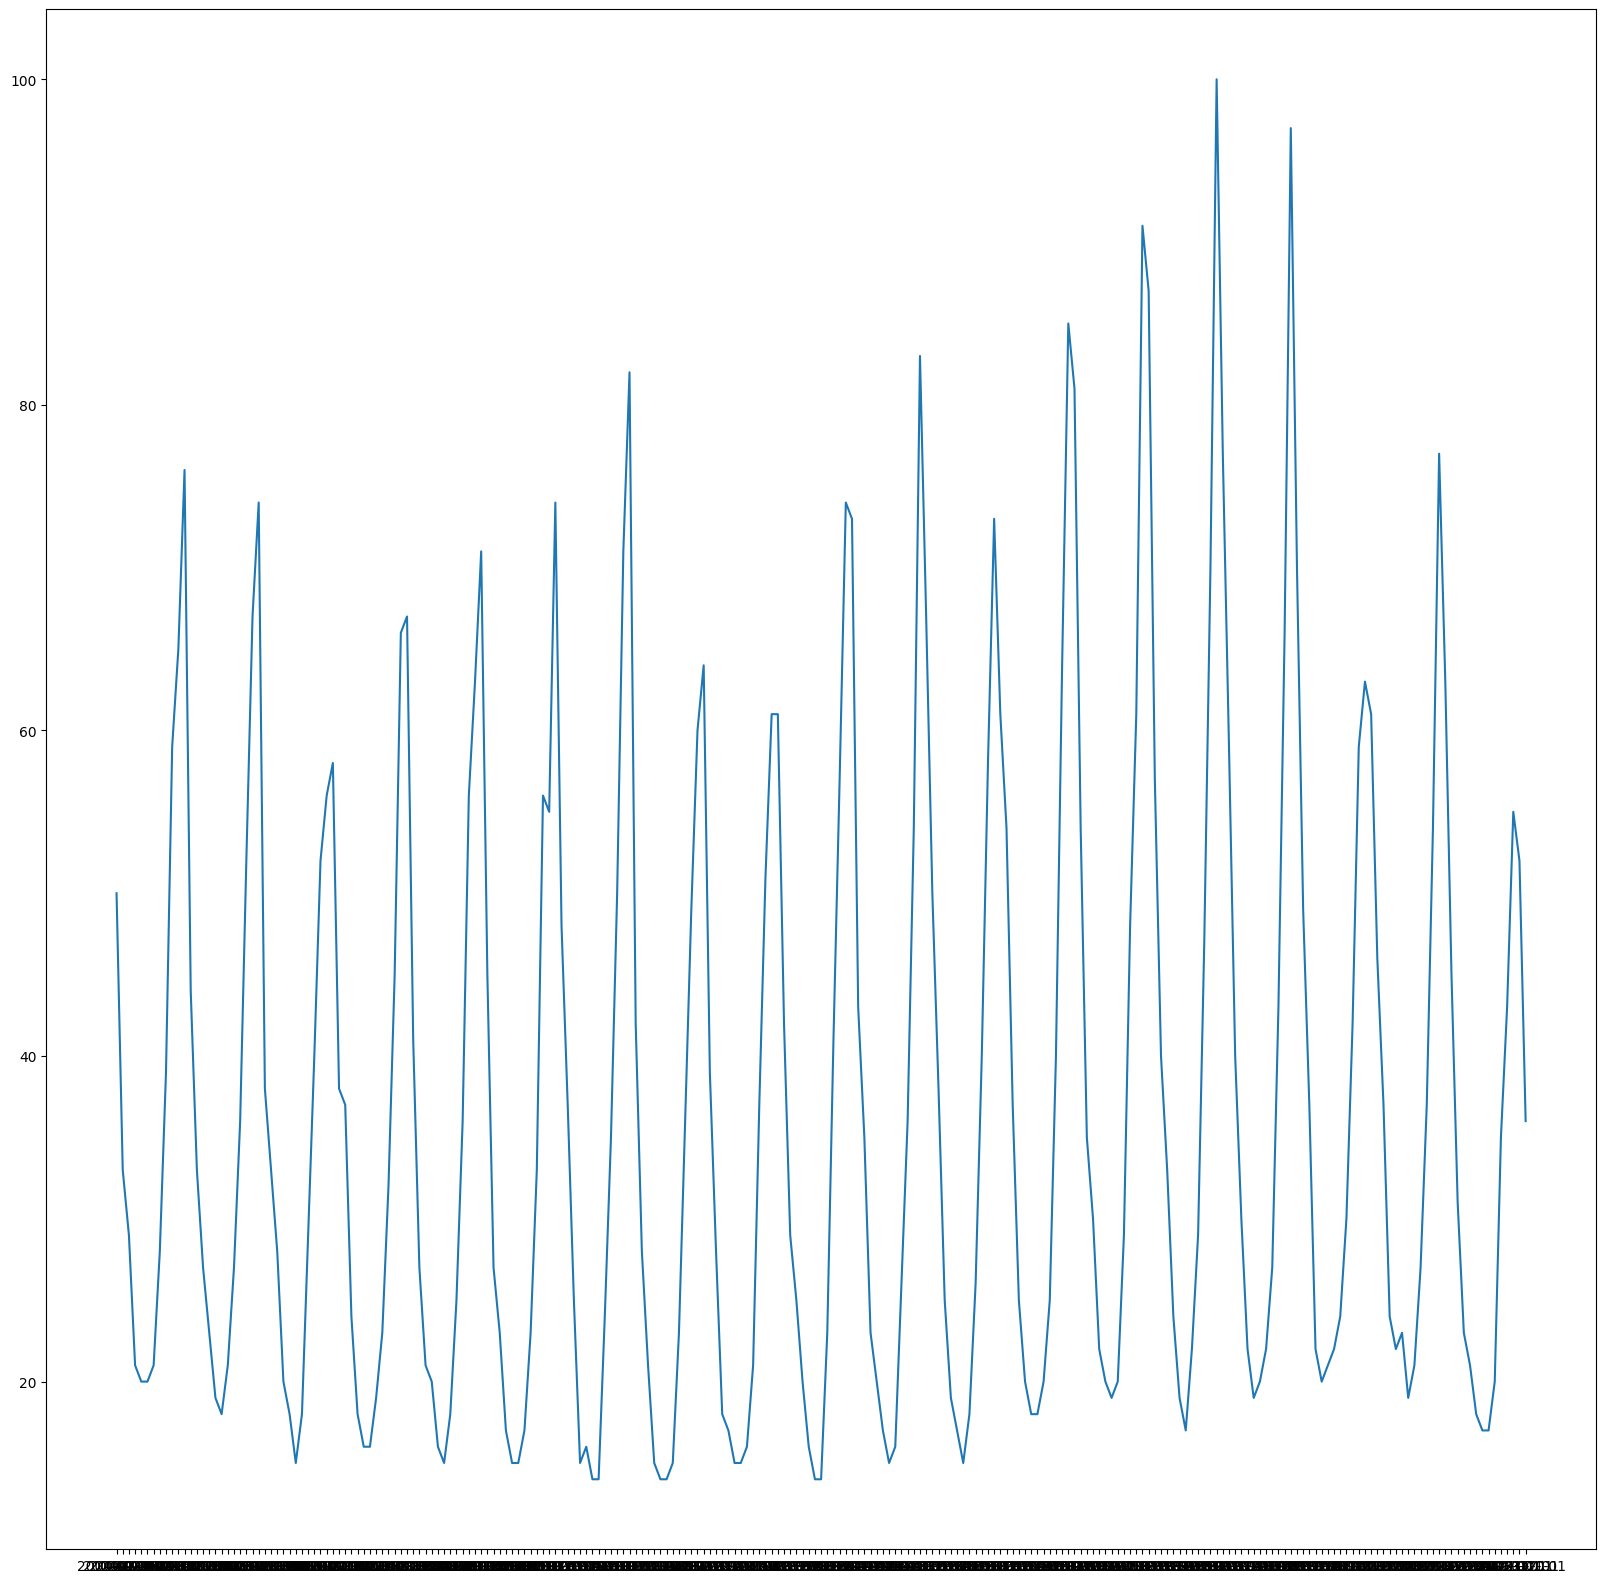

In [5]:
h= m['date']
v= m['value']
plt.figure(figsize=(20,20))
plt.plot(h,v)

In [6]:
future_days= 5
m['Output']= m[['value']].shift(-future_days)
m

,date,value,Output
0,2004-01-01,50,20.0
1,2004-02-01,33,21.0
2,2004-03-01,29,28.0
3,2004-04-01,21,39.0
4,2004-05-01,20,59.0
...,...,...,...
224,2022-09-01,35,NaN
225,2022-10-01,43,NaN
226,2022-11-01,55,NaN
227,2022-12-01,52,NaN


In [7]:
#input and output data formation 
X= np.array(m['value'])[:-future_days]
Y= np.array(m['Output'])[:-future_days]
print(X)
print(Y)


[ 50  33  29  21  20  20  21  28  39  59  65  76  44  33  27  23  19  18
  21  27  36  52  67  74  38  33  28  20  18  15  18  29  40  52  56  58
  38  37  24  18  16  16  19  23  32  45  66  67  41  27  21  20  16  15
  18  25  36  56  63  71  45  27  23  17  15  15  17  23  33  56  55  74
  48  37  25  15  16  14  14  24  35  50  71  82  42  28  21  15  14  14
  15  23  36  49  60  64  39  28  18  17  15  15  16  21  37  51  61  61
  42  29  25  20  16  14  14  23  41  57  74  73  43  35  23  20  17  15
  16  26  36  54  83  67  50  38  25  19  17  15  18  26  40  58  73  61
  54  37  25  20  18  18  20  25  40  64  85  81  54  35  30  22  20  19
  20  29  48  61  91  87  57  40  33  24  19  17  22  29  47  70 100  77
  59  40  30  22  19  20  22  27  43  66  97  70  49  37  22  20  21  22
  24  30  42  59  63  61  46  37  24  22  23  19  21  27  37  54  77  63
  45  31  23  21  18  17  17  20]
[ 20.  21.  28.  39.  59.  65.  76.  44.  33.  27.  23.  19.  18.  21.
  27.  36.  52.  67

In [8]:
#TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=5)

In [9]:
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test= x_test.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

In [15]:
model_dt= DecisionTreeRegressor()


In [16]:
model_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [17]:
x_future= m['value']
x_future = x_future.tail(future_days)
x_future= np.array(x_future)
x_future= x_future.reshape(-1,1)
x_future

array([[35],
       [43],
       [55],
       [52],
       [36]], dtype=int64)

In [18]:
predicted_ans= model_dt.predict(x_future)
predicted_ans

array([21.33333333, 15.        , 15.        , 24.        , 33.        ])

In [19]:
y_pred= model_dt.predict(x_test)
y_pred= y_pred.reshape(-1,1)
y_pred

array([[17.        ],
       [33.        ],
       [54.        ],
       [22.        ],
       [24.        ],
       [45.85714286],
       [59.25      ],
       [35.        ],
       [45.85714286],
       [22.        ],
       [66.        ],
       [55.125     ],
       [58.83333333],
       [59.11111111],
       [20.33333333],
       [23.        ],
       [59.11111111],
       [33.        ],
       [25.        ],
       [26.33333333],
       [30.        ],
       [69.5       ],
       [59.11111111],
       [33.        ],
       [22.        ],
       [19.        ],
       [69.5       ],
       [20.33333333],
       [22.        ],
       [66.        ],
       [59.25      ],
       [58.83333333],
       [18.        ],
       [59.11111111],
       [55.125     ],
       [23.5       ],
       [33.        ],
       [14.        ],
       [24.        ],
       [19.        ],
       [50.83333333],
       [15.        ],
       [59.25      ],
       [22.        ],
       [26.33333333]])

In [20]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred) ** 0.5)
r2 =r2_score(y_test, y_pred)
r2

9.18456790123457
152.65598370006438
12.35540301649705


0.5924080042184334

In [513]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12564\4001790212.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestRegressor()

In [514]:
yrf_pred= model_rf.predict(x_test)
yrf_pred= yrf_pred.reshape(-1, 1)
print(mean_absolute_error(y_test, yrf_pred))
print(mean_squared_error(y_test, yrf_pred))
print(mean_squared_error(y_test, yrf_pred) ** 0.5)
r2 =r2_score(y_test, yrf_pred)
r2

8.804680702014034
131.5859686836294
11.47109274147975


0.683794178381992

In [515]:
from sklearn.linear_model import ElasticNet

In [516]:
model_en = ElasticNet(alpha=1.0, l1_ratio=0.5)


In [517]:
model_en.fit(x_train, y_train)

ElasticNet()

In [518]:
yen_pred= model_en.predict(x_test)
yen_pred= yen_pred.reshape(-1, 1)
print(mean_absolute_error(y_test, yen_pred))
print(mean_squared_error(y_test, yen_pred))
print(mean_squared_error(y_test, yen_pred) ** 0.5)
r2 =r2_score(y_test, yen_pred)
r2

12.594730897041932
218.61994710213867
14.785802213682512


0.4746483938441566

In [519]:
predicted_result_en= model_en.predict(x_future)
predicted_result_en

array([47.73947692, 39.36498939, 34.21145861, 24.54858838, 26.48116243])

In [520]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree= 2
poly=make_pipeline(PolynomialFeatures(degree), LinearRegression())


In [521]:
poly.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [522]:
ypr_pred= poly.predict(x_test)
ypr_pred= ypr_pred.reshape(-1,1)
print(mean_absolute_error(y_test, ypr_pred))
print(mean_squared_error(y_test, ypr_pred))
print(mean_squared_error(y_test, ypr_pred) ** 0.5)
r2 =r2_score(y_test, ypr_pred)
r2

9.459765589705786
139.38290615531434
11.806053792665622


0.6650578568425276

In [21]:
from sklearn.svm import SVR
model_svr= SVR(kernel= 'rbf')
model_svr.fit(x_train, y_train)

c:\Users\Gaurav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [22]:
ysvr_pred= model_svr.predict(x_test)
ysvr_pred= ysvr_pred.reshape(-1,1)
print(mean_absolute_error(y_test, ysvr_pred))
print(mean_squared_error(y_test, ysvr_pred))
print(mean_squared_error(y_test, ysvr_pred) ** 0.5)
r2 =r2_score(y_test, ysvr_pred)
r2

9.981896630878618
168.41939360978887
12.977649772196385


0.5503196461357831

In [23]:
ans_predict= model_en.predict(x_future)
ans_predict


NameError: name 'model_en' is not defined